In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import altair as alt
import scipy.stats as stats

In [3]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [5]:
# Read the data
df = pd.read_csv('data/transfers/top250.csv')
# Let's look at the last few results to see until which date the data is present
df.tail()

Name            Position  Age       Team_from   League_from  \
4695  Jasmin Kurtic  Attacking Midfield   29        Atalanta       Serie A   
4696      Tchê Tchê    Central Midfield   25       Palmeiras       Série A   
4697  Silvan Widmer          Right-Back   25  Udinese Calcio       Serie A   
4698     Yuya Osako      Second Striker   28      1. FC Köln  2.Bundesliga   
4699   Kyle Bartley         Centre-Back   27         Swansea  Championship   

            Team_to     League_to     Season  Market_value  Transfer_fee  
4695           SPAL       Serie A  2018-2019     5000000.0       4800000  
4696    Dynamo Kyiv  Premier Liga  2018-2019     3000000.0       4800000  
4697       FC Basel  Super League  2018-2019     8500000.0       4500000  
4698  Werder Bremen  1.Bundesliga  2018-2019     4500000.0       4500000  
4699      West Brom  Championship  2018-2019     3500000.0       4500000

In [14]:
df.shape

(4700, 10)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
Name            4700 non-null object
Position        4700 non-null object
Age             4700 non-null int64
Team_from       4700 non-null object
League_from     4700 non-null object
Team_to         4700 non-null object
League_to       4700 non-null object
Season          4700 non-null object
Market_value    3440 non-null float64
Transfer_fee    4700 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


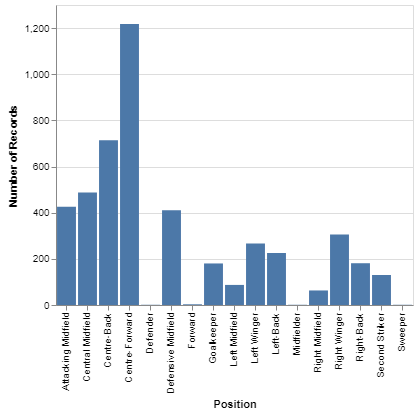

In [6]:
alt.Chart(df).mark_bar().encode(
    alt.X('Position:N'),
    alt.Y('count():Q'),
    #alt.Color('League_to')
)

In [7]:
df[df['Position']=='Defender']

Name  Position  Age Team_from     League_from         Team_to  \
652  Sergio Hellings  Defender   17  Ajax U19  U19 Eredivisie  Anderlecht U19   

    League_to     Season  Market_value  Transfer_fee  
652   Belgium  2002-2003           NaN       2000000

In [17]:
df[df['Position']=='Forward']

Name Position  Age        Team_from     League_from  \
188       Didier Martel  Forward   28       FC Utrecht      Eredivisie   
242      Patricio Camps  Forward   28  Vélez Sarsfield       Argentina   
653  Mazhar Abdelrahman  Forward   25         El Masry  Premier League   

           Team_to     League_to     Season  Market_value  Transfer_fee  
188        Vitesse    Eredivisie  2000-2001           NaN       2750000  
242  PAOK Saloniki  Super League  2000-2001           NaN       1850000  
653         Monaco       Ligue 1  2002-2003           NaN       2000000

In [70]:
lastseason = df[df['Season']=='2018-2019']
lastseason.head()

Name        Position  Age    Team_from     League_from  \
4455      Kylian Mbappé    Right Winger   19       Monaco         Ligue 1   
4456  Cristiano Ronaldo  Centre-Forward   33  Real Madrid          LaLiga   
4457       Thomas Lemar     Left Winger   22       Monaco         Ligue 1   
4458       Riyad Mahrez    Right Winger   27    Leicester  Premier League   
4459            Alisson      Goalkeeper   25      AS Roma         Serie A   

              Team_to       League_to     Season  Market_value  Transfer_fee  
4455         Paris SG         Ligue 1  2018-2019   120000000.0     135000000  
4456         Juventus         Serie A  2018-2019   100000000.0     117000000  
4457  Atlético Madrid          LaLiga  2018-2019    65000000.0      70000000  
4458         Man City  Premier League  2018-2019    50000000.0      67800000  
4459        Liverpool  Premier League  2018-2019    60000000.0      62500000

In [71]:
lastseason.loc[lastseason['League_to']=='Série A', 'League_to']='Serie A'
lastseason.loc[lastseason['League_to']=='Premier Liga', 'League_to']='Russian Premier League'
lastseason.loc[lastseason['League_to']=='Super League', 'League_to']='Swiss Super League'
lastseason.loc[lastseason['League_to']=='Professional League', 'League_to']='Saudi Pro League'
lastseason.loc[lastseason['League_to']=='Liga NOS', 'League_to']='Portuguese Primeira Liga'
lastseason.loc[lastseason['League_to']=='1.Bundesliga', 'League_to']='Bundesliga'



lastseason['League_to'].value_counts()

Serie A                     60
Premier League              50
LaLiga                      35
Bundesliga                  33
Ligue 1                     16
Championship                11
Russian Premier League       8
Liga MX Apertura             7
Eredivisie                   6
Swiss Super League           4
Portuguese Primeira Liga     4
Saudi Pro League             3
MLS                          2
J1 League                    1
Premiership                  1
Serie B                      1
UAE Gulf League              1
Primera División             1
LaLiga2                      1
Name: League_to, dtype: int64

In [79]:
lastseason.loc[lastseason['League_from']=='Série A', 'League_from']='Serie A'
lastseason.loc[lastseason['League_from']=='Premier Liga', 'League_from']='Russian Premier League'
lastseason.loc[lastseason['League_from']=='Super League', 'League_from']='Swiss Super League'
lastseason.loc[lastseason['League_from']=='Professional League', 'League_from']='Saudi Pro League'
lastseason.loc[lastseason['League_from']=='Liga NOS', 'League_from']='Portuguese Primeira Liga'
lastseason.loc[lastseason['League_from']=='1.Bundesliga', 'League_from']='Bundesliga'
lastseason.loc[lastseason['League_from']=='Série B', 'League_from']='Serie B'
lastseason.loc[lastseason['League_from']==' Canada', 'League_from']='Canada'



lastseason['League_from'].value_counts()

Serie A                     53
Ligue 1                     31
LaLiga                      25
Bundesliga                  21
Premier League              19
Championship                15
Portuguese Primeira Liga    13
Liga MX Apertura             9
2.Bundesliga                 7
Serie B                      6
Ligue 2                      6
Swiss Super League           6
Eredivisie                   6
Primera División             5
Russian Premier League       4
Jupiler Pro League           4
League One                   3
Süper Lig                    2
1.HNL                        2
Superligaen                  2
Premiership                  1
LaLiga2                      1
Proximus League              1
Botola Pro                   1
Liga Águila II               1
Canada                       1
Name: League_from, dtype: int64

In [80]:
lastseason[lastseason['League_from']=='Liga Águila II']

Name      Position  Age  Team_from     League_from      Team_to  \
4667  Yimmi Chará  Right Winger   27  Junior FC  Liga Águila II  Atlético-MG   

     League_to     Season  Market_value  Transfer_fee  
4667   Serie A  2018-2019     2500000.0       5100000

In [27]:
lastseason[lastseason['League_to'].isin(['Premiership','LaLiga2','Primera División','Serie B','J1 League'])]

Name        Position  Age      Team_from       League_from  \
4550    Odsonne Edouard  Centre-Forward   20       Paris SG           Ligue 1   
4642        Diego Rolan  Centre-Forward   25    G. Bordeaux           Ligue 1   
4664  Carlos Izquierdoz     Centre-Back   29  Santos Laguna  Liga MX Apertura   
4680           Fabrício  Centre-Forward   28   Portimonense          Liga NOS   
4686    Pietro Iemmello  Centre-Forward   26       Sassuolo           Serie A   

             Team_to         League_to     Season  Market_value  Transfer_fee  
4550          Celtic       Premiership  2018-2019     1500000.0      10300000  
4642  Dep. La Coruña           LaLiga2  2018-2019     3500000.0       6000000  
4664    Boca Juniors  Primera División  2018-2019     3000000.0       5150000  
4680      Urawa Reds         J1 League  2018-2019     4000000.0       5000000  
4686       Benevento           Serie B  2018-2019     2000000.0       5000000

In [54]:
lastseason_cleaner = lastseason.drop(lastseason[lastseason['League_to'].isin(['Premiership','LaLiga2','Primera División','Serie B','J1 League','UAE Gulf League'])].index)
lastseason_cleaner['League_to'].value_counts()

Serie A                     60
Premier League              50
LaLiga                      35
Bundesliga                  33
Ligue 1                     16
Championship                11
Russian Premier League       8
Liga MX Apertura             7
Eredivisie                   6
Swiss Super League           4
Portuguese Primeira Liga     4
Saudi Pro League             3
MLS                          2
Name: League_to, dtype: int64

In [134]:
chart = alt.Chart(lastseason_cleaner).mark_bar().encode(
    alt.X('Position:N', axis = alt.Axis(labelAngle=-45)),
    alt.Y('count():Q', title='Number of Transfers'),
    alt.Color('League_to', scale=alt.Scale(scheme='category20'), title='Destination League')
).properties(width=350)

In [135]:
chart = chart.properties(title='2018-2019 PreSeason Window Transfers broken down by Position and Destination League')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10, anchor='middle'))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

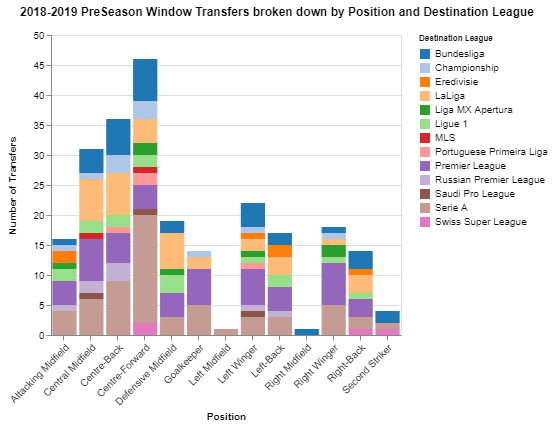

In [136]:
chart

In [137]:
chart.save('plots/transfer_position_league_to.png', scale_factor=7.0)

In [138]:
# More Colorblind friendly chart perhaps?
chart = alt.Chart(lastseason_cleaner).mark_bar().encode(
    alt.X('Position:N', axis = alt.Axis(labelAngle=-45)),
    alt.Y('count():Q', title='Number of Transfers'),
    alt.Color('League_to', scale=alt.Scale(scheme='tableau20'), title='Destination League')
).properties(width=350)

In [139]:
chart = chart.properties(title='2018-2019 PreSeason Window Transfers broken down by Position and Destination League')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10, anchor='middle'))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

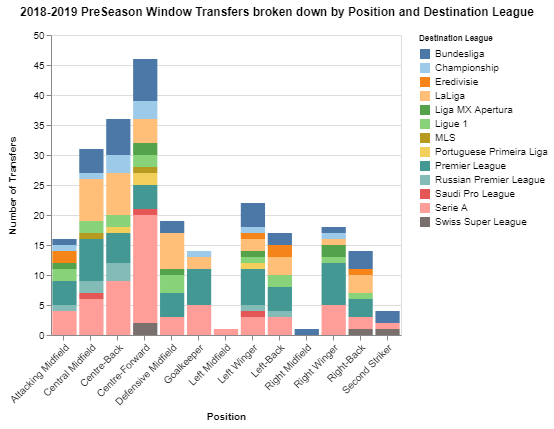

In [140]:
chart

In [141]:
chart.save('plots/transfer_position_league_to_cb.png', scale_factor=7.0)

In [144]:
lastseason_cleaner_top5 = lastseason_cleaner.drop(lastseason_cleaner[lastseason_cleaner['League_to'].isin(['Championship', 
                                                                                   'Russian Premier League', 
                                                                                   'Liga MX Apertura',
                                                                                   'Eredivisie',
                                                                                   'Swiss Super League',
                                                                                   'Portuguese Primeira Liga',
                                                                                   'Saudi Pro League',
                                                                                    'MLS'])].index)
lastseason_cleaner_top5['League_to'].value_counts()

Serie A           60
Premier League    50
LaLiga            35
Bundesliga        33
Ligue 1           16
Name: League_to, dtype: int64

In [149]:
chart = alt.Chart(lastseason_cleaner_top5).mark_bar().encode(
    alt.X('Position:N', axis = alt.Axis(labelAngle=-45)),
    alt.Y('count():Q', title='Number of Transfers'),
    alt.Color('League_to', title='Destination League')
).properties(width=350)

In [150]:
chart = chart.properties(title='2018-2019 PreSeason Window Transfers broken down by Position - Top 5 Leagues')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10, anchor='middle'))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

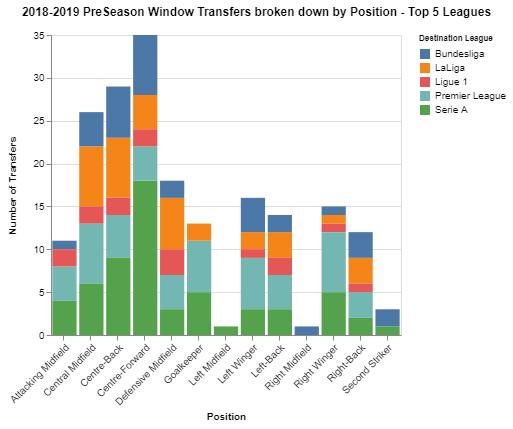

In [151]:
chart

In [152]:
chart.save('plots/transfer_position_league_to_top5.png', scale_factor=7.0)

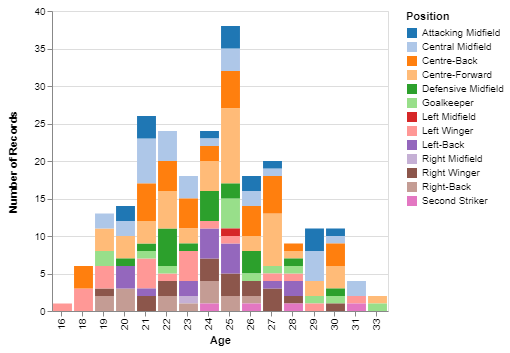

In [108]:
alt.Chart(lastseason_cleaner).mark_bar().encode(
    alt.X('Age:N'),
    alt.Y('count()'),
    alt.Color('Position:N', scale=alt.Scale(scheme='category20'))
)

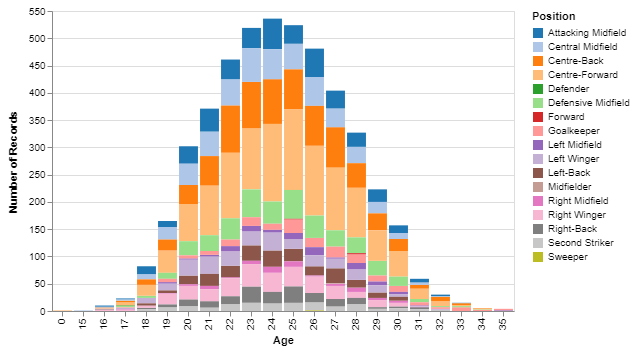

In [109]:
alt.Chart(df).mark_bar().encode(
    alt.X('Age:N'),
    alt.Y('count()'),
    alt.Color('Position:N', scale=alt.Scale(scheme='category20'))
)

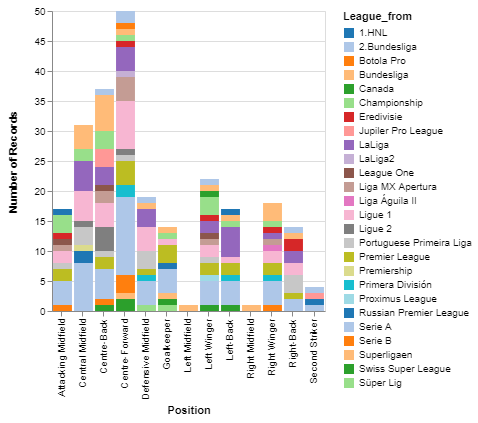

In [81]:
alt.Chart(lastseason).mark_bar().encode(
    alt.X('Position:N'),
    alt.Y('count():Q'),
    alt.Color('League_from', scale=alt.Scale(scheme='category20'))
)

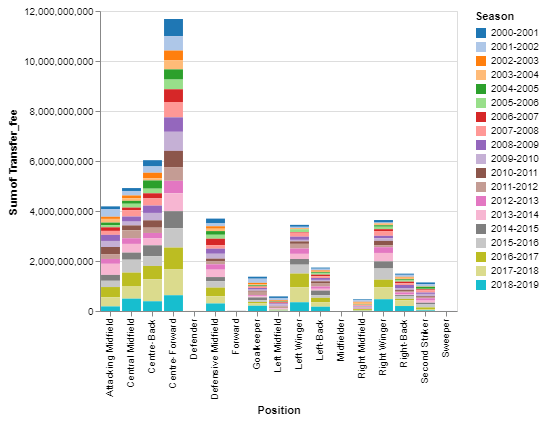

In [89]:
alt.Chart(df).mark_bar().encode(
    alt.X('Position:N'),
    alt.Y('sum(Transfer_fee):Q'),
    alt.Color('Season', scale=alt.Scale(scheme='category20'))
)

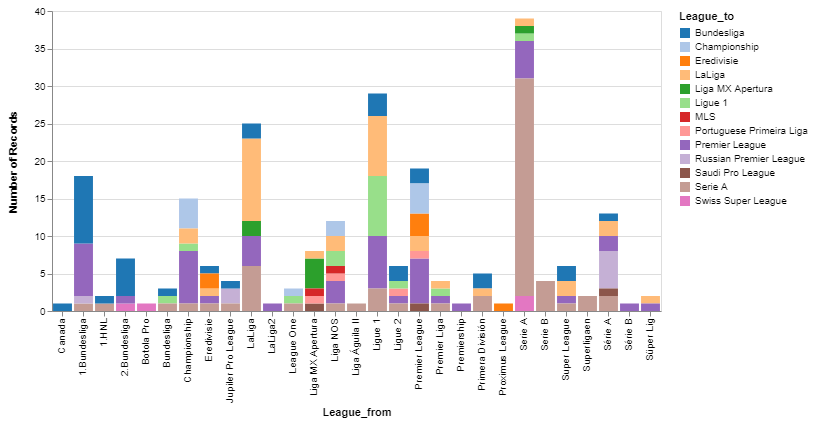

In [82]:
alt.Chart(lastseason_cleaner).mark_bar().encode(
    alt.X('League_from:N'),
    alt.Y('count():Q'),
    alt.Color('League_to', scale=alt.Scale(scheme='category20'))
)